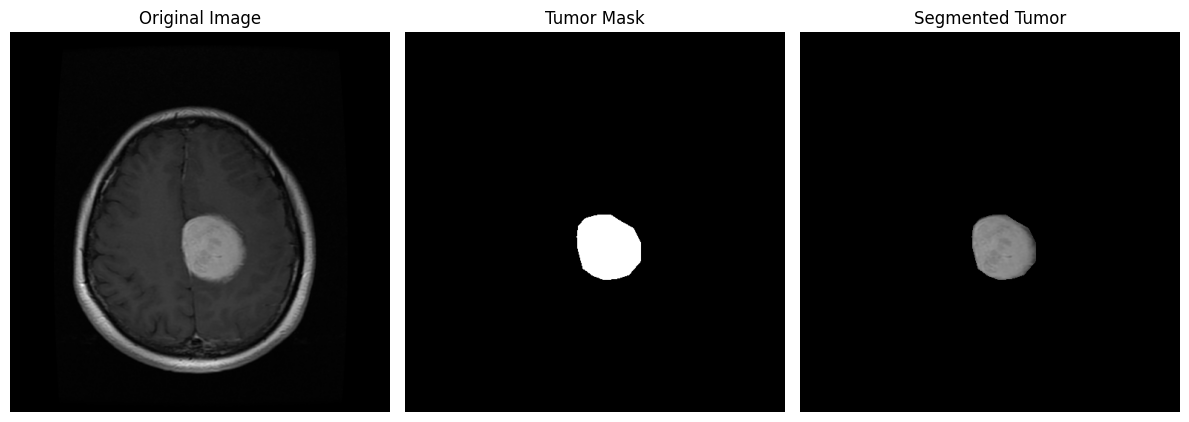

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_tumor_with_mask(original_image_path, mask_image_path):
    # Load the original image and the mask
    original = cv2.imread(original_image_path)
    mask = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)  # Load mask as grayscale

    # Check if mask and original image are loaded correctly
    if original is None or mask is None:
        print("Error loading images!")
        return

    # Resize the mask to match the original image size if they are different
    mask = cv2.resize(mask, (original.shape[1], original.shape[0]))

    # Apply the mask on the original image to extract the tumor region
    segmented_tumor = cv2.bitwise_and(original, original, mask=mask)

    # Create a colored representation of the mask (red-colored tumor mask)
    colored_mask = np.zeros_like(original)
    colored_mask[mask > 0] = [255, 0, 0]  # Red color (BGR)

    # Blend the original image with the mask (colored overlay)
    blended_image = cv2.addWeighted(original, 0.7, colored_mask, 0.3, 0)

    # Display the results using Matplotlib for better visualization
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))  # Convert to RGB for Matplotlib
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='gray')  # Display mask in grayscale
    plt.title("Tumor Mask")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(segmented_tumor, cv2.COLOR_BGR2RGB))  # Segmented Tumor
    plt.title("Segmented Tumor")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# Example usage
original_image_path ='/content/MRI image of brain.png'  # Replace with the path to your original image
mask_image_path ='/content/Masked image of brain.png'  # Replace with the path to your mask image

segment_tumor_with_mask(original_image_path, mask_image_path)
